In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import plotly.express as px
import pandera as pa
import datetime




In [5]:
df_geral = pd.read_csv("geral.csv", sep=';', parse_dates=['dt_abertura','dt_fechamento','dt_diagnostico','dt_resolucao'], dayfirst=True)

df_dias =  pd.read_csv("dias_trabalhados.csv", sep=';')
df_proj_prod =  pd.read_csv("projeto_produto.csv", sep=';')
df_projetos =  pd.read_csv("projetos.csv", sep=';')
#from datetime import datetime



df_dias

,agentes,dias_trab_jul,dias_trab_ago,dias_trab_set
0,Agente 1,10,16,16
1,Agente 2,19,13,10
2,Agente 3,21,21,19
3,Agente 4,21,4,0
4,Agente 5,6,12,13
5,Agente 6,9,18,18
6,Agente 7,19,19,17
7,Agente 8,20,17,18


In [3]:
#plt.subplots(figsize=(19.2,10.8))
#image = plt.figure(figsize=(10,10.80))

#df_geral.groupby(['agente']).size().plot.pie(title='Chamados por agente',label='');

### Função para ver os clientes que cancelaram algum de seus projetos

In [4]:
print(df_projetos['p_ativos_julho'].sum())
print(df_projetos['p_ativos_agosto'].sum())
print(df_projetos['p_ativos_setembro'].sum())

118
110
98


In [5]:
baixas= []
def verifica(df):
    for i in range(52):
            if df_projetos.iloc[i,3] < df_projetos.iloc[i,1]:
                print(df_projetos.iloc[i,0])
                baixas.append(df_projetos.iloc[i,0])
                
    #df_projetos.iloc[0,0]

In [6]:
verifica(df_projetos)

Cliente 4
Cliente 23
Cliente 34
Cliente 35
Cliente 45
Cliente 46
Cliente 49
Cliente 50
Cliente 52


In [7]:
baixas

['Cliente 4',
 'Cliente 23',
 'Cliente 34',
 'Cliente 35',
 'Cliente 45',
 'Cliente 46',
 'Cliente 49',
 'Cliente 50',
 'Cliente 52']

#### Cancelados em agosto

In [8]:
cancelados_ago= []
dic_ago= dict()
def verifica_ago(df):
    for i in range(52):
            if df_projetos.iloc[i,2] < df_projetos.iloc[i,1]:
                print(df_projetos.iloc[i,0])
                print(df_projetos.iloc[i,1])
                cancelados_ago.append(df_projetos.iloc[i,0])
                #dic_ago[df_projetos.iloc[i,0]] = df_projetos.iloc[i,1]
                dic_ago.update({'df_projetos.iloc[i,0]': df_projetos.iloc[i,1]})

                

In [9]:
verifica_ago(df_projetos)

Cliente 4
1
Cliente 23
1
Cliente 34
5
Cliente 45
3
Cliente 46
3
Cliente 49
1


In [10]:
cancelados_set= []
def verifica_set(df):
    for i in range(52):
            if df_projetos.iloc[i,3] < df_projetos.iloc[i,2]:
                print(df_projetos.iloc[i,0])
                print(df_projetos.iloc[i,2])

                cancelados_set.append(df_projetos.iloc[i,0])
                

In [11]:
verifica_set(df_projetos)

Cliente 35
6
Cliente 50
1
Cliente 52
5


In [12]:
verifica(df_projetos)

Cliente 4
Cliente 23
Cliente 34
Cliente 35
Cliente 45
Cliente 46
Cliente 49
Cliente 50
Cliente 52


### Substituindo os valores nulos na coluna agente por Desconhecido

In [13]:
df_geral['agente'] = df_geral['agente'].fillna('Desconhecido')

### Crio a coluna diferenca de dias, que é a diferença entre abertura e fechamento do chamado

In [14]:
df_geral['diferenca_dias'] = df_geral.dt_fechamento - df_geral.dt_abertura
df_geral["diferenca_dias"] = (df_geral["diferenca_dias"]).dt.days
#df_geral['diferenca_dias'] = df_geral['diferenca_dias'].fillna('-1')


#(df_geral.dt_fechamento - df_geral.dt_abertura).mean()

In [15]:
df_geral.isnull().sum()


numero_chamado        0
dt_abertura           0
hora_abertura         0
dt_fechamento       196
hora_fechamento     196
dt_diagnostico      125
hora_diagnostico    125
dt_resolucao        265
hora_resolucao      265
classificacao         0
categoria             0
cliente               0
produto               0
agente                0
diferenca_dias      196
dtype: int64

In [16]:
df_geral

,numero_chamado,dt_abertura,hora_abertura,dt_fechamento,hora_fechamento,dt_diagnostico,hora_diagnostico,dt_resolucao,hora_resolucao,classificacao,categoria,cliente,produto,agente,diferenca_dias
0,1,2021-07-01,08:19:30,2021-07-01,12:23:47,2021-07-01,12:00:00,2021-07-01,00:00:00,Incidente,Incidente de Software,Cliente 35,Leaf,Agente 1,0.0
1,2,2021-07-01,14:43:27,2021-07-19,16:01:12,NaT,NaN,NaT,NaN,Requisi��o,Controle,Cliente 41,Flowe,Agente 2,18.0
2,3,2021-07-02,08:36:08,2021-07-19,17:58:29,2021-07-02,12:00:00,2021-07-02,00:00:00,Incidente,Sintonia,Cliente 28,Leaf,Agente 1,17.0
3,4,2021-07-02,08:42:12,2021-08-02,14:35:22,NaT,NaN,NaT,NaN,Requisi��o,Controle,Cliente 22,Flowe,Agente 3,31.0
4,5,2021-07-02,16:01:32,2021-07-02,16:59:09,NaT,NaN,NaT,NaN,Requisi��o,Controle,Cliente 25,Flowe,Agente 2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,412,2021-09-28,15:02:21,NaT,NaN,2021-09-28,12:00:00,NaT,NaN,Incidente,Incidente de Infraestrutura,Cliente 33,Leaf,Desconhecido,NaN
412,413,2021-09-29,14:43:12,2021-09-30,17:52:43,2021-09-30,12:00:00,NaT,NaN,Requisi��o,Requisi��o de Infraestrutura,Cliente 22,Flowe,Agente 3,1.0
413,414,2021-09-29,16:30:50,NaT,NaN,2021-09-29,12:00:00,NaT,NaN,Incidente,Incidente de Software,Cliente 43,Leaf,Desconhecido,NaN
414,415,2021-09-29,18:02:55,NaT,NaN,2021-09-29,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 28,Leaf,Desconhecido,NaN


#### Fazendo separação por mês

In [17]:
#df_geral.dtypes

In [18]:
filtro_julho= df_geral.dt_abertura.dt.month == 7
filtro_agosto= df_geral.dt_abertura.dt.month == 8
filtro_setembro= df_geral.dt_abertura.dt.month == 9


julho=df_geral.loc[filtro_julho] 
agosto=df_geral.loc[filtro_agosto] 
setembro=df_geral.loc[filtro_setembro] 

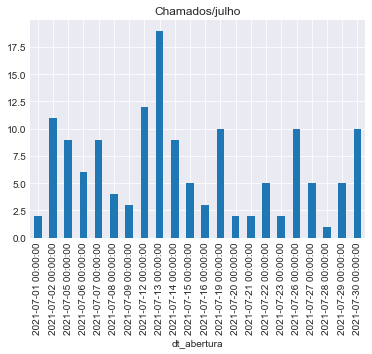

In [19]:
#ja deu pra ver que na segunda e sexta e onde tem mais chamado
#date_element = datetime_element.date()

#plt.subplots(figsize=(10.8,7.2))

julho.groupby(['dt_abertura']).size().plot.bar(title='Chamados/julho');


In [20]:
(julho.groupby(['dt_abertura']).size()).shape
144/22   #chamados por dia em media

6.545454545454546

In [21]:
#df_geral

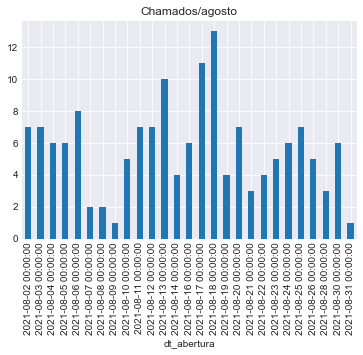

In [22]:
agosto.groupby(['dt_abertura']).size().plot.bar(title='Chamados/agosto');

In [23]:
agosto.groupby(['dt_abertura']).size().sum()
153/27 #chamados por dia nesse mes

5.666666666666667

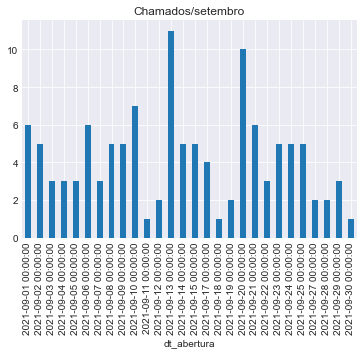

In [24]:
setembro.groupby(['dt_abertura']).size().plot.bar(title='Chamados/setembro');
#nas segundas, aumentava bastante

In [70]:
df_geral.groupby(['agente']).size()


agente
Agente 1         21
Agente 2         46
Agente 3         37
Agente 4         23
Agente 5         21
Agente 6         17
Agente 7         25
Agente 8         30
Desconhecido    196
dtype: int64

In [25]:
(setembro.groupby(['dt_abertura']).size()).shape
119/28 #chamados por dia nesse mes

4.25

In [26]:
df_geral.groupby(['agente','categoria']).size().head(60).sort_values(ascending=False)
#df_geral.groupby(['agente','categoria']).size().head(60)

agente        categoria                   
Desconhecido  Incidente de Infraestrutura     53
              Controle                        42
Agente 3      Controle                        26
Agente 8      Incidente de Infraestrutura     15
Agente 2      Sintonia                        15
              Controle                        13
Agente 4      Sintonia                        11
Desconhecido  Falta de informa��o             11
              Incidente do Dashboard           9
Agente 2      Incidente de Infraestrutura      9
Agente 8      Sintonia                         8
Agente 5      Incidente de Infraestrutura      8
Agente 1      Incidente de Infraestrutura      7
Desconhecido  Incidente de Software            7
Agente 6      Incidente de Infraestrutura      6
Agente 5      Sintonia                         6
Agente 6      Sintonia                         5
Agente 5      Controle                         5
Agente 7      Incidente de Infraestrutura      5
Agente 4      Controle    

In [27]:
#df_geral.groupby(['agente','produto']).size().head(60).sort_values(ascending=False)
df_geral.groupby(['agente','produto']).size()

agente        produto
Agente 1      Flowe        2
              Leaf        19
Agente 2      Flowe       42
              Leaf         4
Agente 3      Flowe       33
              Leaf         4
Agente 4      Flowe        3
              Leaf        20
Agente 5      Flowe        2
              Leaf        19
Agente 6      Leaf        17
Agente 7      Flowe       22
              Leaf         3
Agente 8      Flowe        1
              Leaf        29
Desconhecido  Flowe       82
              Leaf       114
dtype: int64

produto
Flowe    187
Leaf     229
dtype: int64

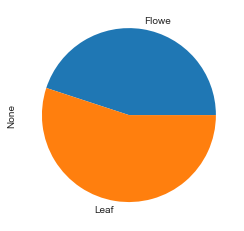

In [28]:
df_geral.groupby(['produto']).size().plot.pie();
df_geral.groupby(['produto']).size()

agente
Desconhecido    196
Agente 2         46
Agente 3         37
Agente 8         30
Agente 7         25
Agente 4         23
Agente 1         21
Agente 5         21
Agente 6         17
dtype: int64

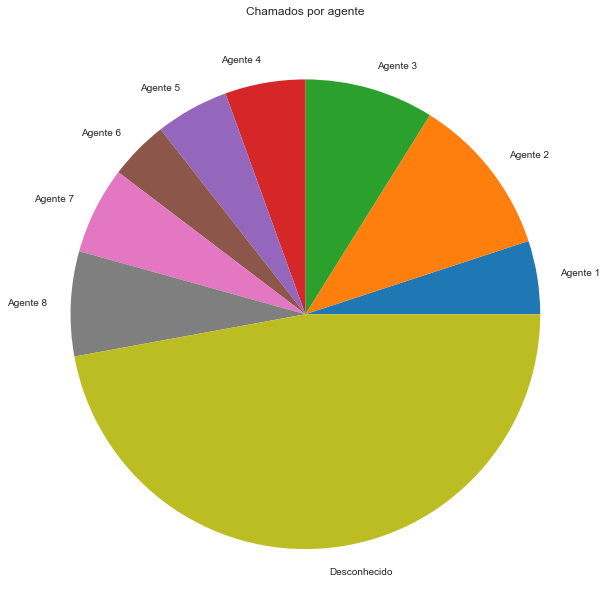

In [29]:
plt.subplots(figsize=(19.2,10.8))
#image = plt.figure(figsize=(10,10.80))

df_geral.groupby(['agente']).size().plot.pie(title='Chamados por agente',label='');
#image.figure.savefig('myimage.svg', format='svg', dpi=1200) salva imagem em formato svg
df_geral.groupby(['agente']).size().sort_values(ascending=False)

In [30]:
filtro_agente1= df_geral.agente == 'Agente 1'
filtro_agente2= df_geral.agente == 'Agente 2'
filtro_agente3= df_geral.agente == 'Agente 3'
filtro_agente4= df_geral.agente == 'Agente 4'
filtro_agente5= df_geral.agente == 'Agente 5'
filtro_agente6= df_geral.agente == 'Agente 6'
filtro_agente7= df_geral.agente == 'Agente 7'
filtro_agente8= df_geral.agente == 'Agente 8'
filtro_desconhecido= df_geral.agente == 'Desconhecido'




df_geral.loc[filtro_agente1].groupby(['dt_abertura']).diferenca_dias.sum().mean()
#print(df_geral.loc[filtro_agente1].groupby(['dt_abertura']).diferenca_dias.sum().mean())


10.0

### Análises dos clientes que cancelaram

In [31]:
baixas[:]

['Cliente 4',
 'Cliente 23',
 'Cliente 34',
 'Cliente 35',
 'Cliente 45',
 'Cliente 46',
 'Cliente 49',
 'Cliente 50',
 'Cliente 52',
 'Cliente 4',
 'Cliente 23',
 'Cliente 34',
 'Cliente 35',
 'Cliente 45',
 'Cliente 46',
 'Cliente 49',
 'Cliente 50',
 'Cliente 52']

In [32]:
#filtrando somente os clientes que cancelaram, e estão dentro desse vetor 'baixas', o isin() faz esse servico verificando 
filtro_baixas= df_geral.cliente.isin(baixas)

df_baixas=df_geral.loc[filtro_baixas] 
df_baixas

,numero_chamado,dt_abertura,hora_abertura,dt_fechamento,hora_fechamento,dt_diagnostico,hora_diagnostico,dt_resolucao,hora_resolucao,classificacao,categoria,cliente,produto,agente,diferenca_dias
0,1,2021-07-01,08:19:30,2021-07-01,12:23:47,2021-07-01,12:00:00,2021-07-01,00:00:00,Incidente,Incidente de Software,Cliente 35,Leaf,Agente 1,0.0
11,12,2021-07-02,17:33:37,2021-07-27,20:55:27,2021-07-15,12:00:00,2021-07-16,00:00:00,Requisi��o,Controle,Cliente 35,Leaf,Agente 4,25.0
12,13,2021-07-02,17:35:09,NaT,NaN,2021-07-15,12:00:00,NaT,NaN,Requisi��o,Controle,Cliente 35,Leaf,Desconhecido,NaN
41,42,2021-07-09,09:47:53,2021-07-13,09:00:50,2021-07-09,12:00:00,2021-07-09,00:00:00,Incidente,Sintonia,Cliente 46,Leaf,Agente 4,4.0
46,47,2021-07-12,10:15:13,NaT,NaN,2021-07-15,12:00:00,NaT,NaN,Requisi��o,Controle,Cliente 35,Leaf,Desconhecido,NaN
73,74,2021-07-13,12:54:52,2021-07-29,14:24:57,NaT,NaN,NaT,NaN,Requisi��o,Controle,Cliente 23,Flowe,Agente 3,16.0
86,87,2021-07-15,12:50:00,2021-07-19,12:03:36,2021-07-15,12:00:00,2021-07-15,00:00:00,Incidente,Sintonia,Cliente 23,Flowe,Agente 2,4.0
129,130,2021-07-29,09:47:26,2021-07-30,16:21:52,NaT,NaN,NaT,NaN,Requisi��o,Controle,Cliente 46,Leaf,Agente 6,1.0
169,170,2021-08-05,08:58:58,NaT,NaN,2021-09-13,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 34,Leaf,Desconhecido,NaN
186,187,2021-08-10,12:22:36,NaT,NaN,2021-09-13,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 34,Leaf,Desconhecido,NaN


#### Vendo a quantidade de projetos cancelados em agosto

In [33]:
#filtrando somente os clientes que cancelaram, e estão dentro desse vetor 'baixas', o isin() faz esse servico verificando 
filtro_baixas_ago= df_projetos.cliente.isin(cancelados_ago)

df_baixas_ago=df_projetos.loc[filtro_baixas_ago] 
print(df_baixas_ago['p_ativos_julho'].sum())
print(df_baixas_ago['p_ativos_agosto'].sum())

#df_baixas_ago

14
6


In [34]:
df_baixas_ago

,cliente,p_ativos_julho,p_ativos_agosto,p_ativos_setembro
3,Cliente 4,1,0,0
22,Cliente 23,1,0,0
33,Cliente 34,5,4,4
44,Cliente 45,3,0,0
45,Cliente 46,3,2,2
48,Cliente 49,1,0,0


In [35]:
#filtrando somente os clientes que cancelaram, e estão dentro desse vetor 'baixas', o isin() faz esse servico verificando 
filtro_baixas_set= df_projetos.cliente.isin(cancelados_set)

df_baixas_set=df_projetos.loc[filtro_baixas_set] 

print(df_baixas_set['p_ativos_agosto'].sum())
print(df_baixas_set['p_ativos_setembro'].sum())

#df_baixas_set

12
0


produto
Flowe     2
Leaf     31
dtype: int64

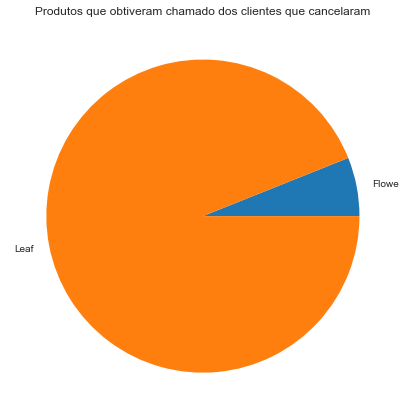

In [36]:
plt.subplots(figsize=(10.8,7.2))

df_baixas
df_baixas.groupby(['produto']).size().plot.pie(title='Produtos que obtiveram chamado dos clientes que cancelaram',label='');
df_baixas.groupby(['produto']).size()

categoria
Falta de informa��o             3
Incidente de Infraestrutura     6
Incidente de Software           1
Sintonia                       15
dtype: int64

C:\Users\Victor\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Victor\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


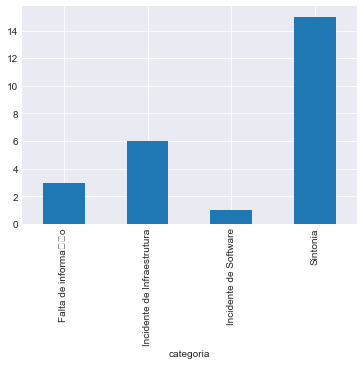

In [37]:
filtro = df_baixas.classificacao == 'Incidente'
df_baixas.loc[filtro].groupby(['categoria']).size().plot.bar();
df_baixas.loc[filtro].groupby(['categoria']).size()

<AxesSubplot:xlabel='categoria'>

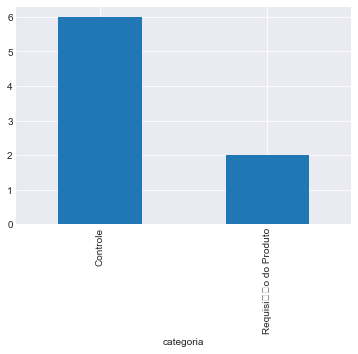

In [38]:
filtro = df_baixas.classificacao == 'Requisi��o'
df_baixas.loc[filtro].groupby(['categoria']).size().plot.bar()

## AQUIII

In [71]:
df_baixas.groupby(['agente']).size()

agente
Agente 1         1
Agente 2         1
Agente 3         2
Agente 4         2
Agente 5         2
Agente 6         2
Agente 7         1
Agente 8         3
Desconhecido    19
dtype: int64

In [40]:
df_baixas.groupby(['cliente', df_baixas.agente]).categoria.sum()


cliente     agente      
Cliente 23  Agente 2                                                 Sintonia
            Agente 3                                                 Controle
Cliente 34  Agente 3                              Incidente de Infraestrutura
            Agente 5                                                 Controle
            Agente 6                                      Falta de informa��o
            Desconhecido    SintoniaSintoniaSintoniaFalta de informa��oSin...
Cliente 35  Agente 1                                    Incidente de Software
            Agente 4                                                 Controle
            Desconhecido                                     ControleControle
Cliente 4   Desconhecido                                  Falta de informa��o
Cliente 45  Agente 8                      SintoniaIncidente de Infraestrutura
            Desconhecido    SintoniaIncidente de InfraestruturaIncidente d...
Cliente 46  Agente 4                   

In [41]:
df_geral.groupby(['agente', df_geral.cliente]).categoria.sum().head(50)


agente    cliente   
Agente 1  Cliente 12                                 Envio de informa��es
          Cliente 13     Envio de informa��esRequisi��o de Infraestrutura
          Cliente 14                                             Sintonia
          Cliente 19                                     ControleSintonia
          Cliente 20                          Incidente de Infraestrutura
          Cliente 25                                             Sintonia
          Cliente 27                          Incidente de Infraestrutura
          Cliente 28                  SintoniaIncidente de Infraestrutura
          Cliente 30                                             Sintonia
          Cliente 33     Incidente de InfraestruturaIncidente de Software
          Cliente 35                                Incidente de Software
          Cliente 36                                Requisi��o do Produto
          Cliente 39    Envio de informa��esRequisi��o de Infraestrutu...
          Cliente

In [42]:
df_baixas.groupby(['cliente']).size().sort_values(ascending=False)

cliente
Cliente 34    9
Cliente 45    7
Cliente 35    4
Cliente 46    4
Cliente 52    3
Cliente 23    2
Cliente 50    2
Cliente 4     1
Cliente 49    1
dtype: int64

In [43]:
df_baixas

,numero_chamado,dt_abertura,hora_abertura,dt_fechamento,hora_fechamento,dt_diagnostico,hora_diagnostico,dt_resolucao,hora_resolucao,classificacao,categoria,cliente,produto,agente,diferenca_dias
0,1,2021-07-01,08:19:30,2021-07-01,12:23:47,2021-07-01,12:00:00,2021-07-01,00:00:00,Incidente,Incidente de Software,Cliente 35,Leaf,Agente 1,0.0
11,12,2021-07-02,17:33:37,2021-07-27,20:55:27,2021-07-15,12:00:00,2021-07-16,00:00:00,Requisi��o,Controle,Cliente 35,Leaf,Agente 4,25.0
12,13,2021-07-02,17:35:09,NaT,NaN,2021-07-15,12:00:00,NaT,NaN,Requisi��o,Controle,Cliente 35,Leaf,Desconhecido,NaN
41,42,2021-07-09,09:47:53,2021-07-13,09:00:50,2021-07-09,12:00:00,2021-07-09,00:00:00,Incidente,Sintonia,Cliente 46,Leaf,Agente 4,4.0
46,47,2021-07-12,10:15:13,NaT,NaN,2021-07-15,12:00:00,NaT,NaN,Requisi��o,Controle,Cliente 35,Leaf,Desconhecido,NaN
73,74,2021-07-13,12:54:52,2021-07-29,14:24:57,NaT,NaN,NaT,NaN,Requisi��o,Controle,Cliente 23,Flowe,Agente 3,16.0
86,87,2021-07-15,12:50:00,2021-07-19,12:03:36,2021-07-15,12:00:00,2021-07-15,00:00:00,Incidente,Sintonia,Cliente 23,Flowe,Agente 2,4.0
129,130,2021-07-29,09:47:26,2021-07-30,16:21:52,NaT,NaN,NaT,NaN,Requisi��o,Controle,Cliente 46,Leaf,Agente 6,1.0
169,170,2021-08-05,08:58:58,NaT,NaN,2021-09-13,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 34,Leaf,Desconhecido,NaN
186,187,2021-08-10,12:22:36,NaT,NaN,2021-09-13,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 34,Leaf,Desconhecido,NaN


In [44]:
filtro = df_baixas.categoria == 'Sintonia                       '
#df_geral.loc[filtro].groupby(['dt_abertura']).size().plot.bar(title='Chamados');
#df_geral.loc[filtro].groupby(['diferenca_dias']).size()
(df_baixas.loc[df_baixas.categoria == 'Incidente de Infraestrutura'])['diferenca_dias'].mean()



4.5

In [45]:
filtro_baixas_ago= df_baixas.cliente.isin(cancelados_ago)
filtro_desconhecido1= df_geral.agente == 'Desconhecido'

df_baixas_ago_geral=df_baixas.loc[filtro_baixas_ago & filtro_desconhecido1] 


df_baixas_ago_geral['dias_aberto'] =  datetime.datetime(2021, 7, 31) - df_baixas_ago_geral.dt_abertura;
df_baixas_ago_geral['dias_aberto'] = (df_baixas_ago_geral['dias_aberto']).dt.days;


C:\Users\Victor\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Victor\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
df_baixas_ago_geral

,numero_chamado,dt_abertura,hora_abertura,dt_fechamento,hora_fechamento,dt_diagnostico,hora_diagnostico,dt_resolucao,hora_resolucao,classificacao,categoria,cliente,produto,agente,diferenca_dias,dias_aberto
169,170,2021-08-05,08:58:58,NaT,NaN,2021-09-13,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 34,Leaf,Desconhecido,NaN,-5
186,187,2021-08-10,12:22:36,NaT,NaN,2021-09-13,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 34,Leaf,Desconhecido,NaN,-10
206,207,2021-08-13,14:56:53,NaT,NaN,2021-09-13,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 34,Leaf,Desconhecido,NaN,-13
207,208,2021-08-13,15:22:47,NaT,NaN,2021-08-17,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 46,Leaf,Desconhecido,NaN,-13
209,210,2021-08-13,16:49:45,NaT,NaN,2021-08-18,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 46,Leaf,Desconhecido,NaN,-13
210,211,2021-08-13,16:55:35,NaT,NaN,2021-08-16,12:00:00,NaT,NaN,Incidente,Falta de informa��o,Cliente 34,Leaf,Desconhecido,NaN,-13
262,263,2021-08-22,15:58:56,NaT,NaN,2021-08-22,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 34,Leaf,Desconhecido,NaN,-22
295,296,2021-08-30,14:20:22,NaT,NaN,2021-09-13,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 34,Leaf,Desconhecido,NaN,-30
311,312,2021-09-04,10:53:02,NaT,NaN,2021-09-04,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 45,Leaf,Desconhecido,NaN,-35
343,344,2021-09-11,08:27:20,NaT,NaN,2021-09-11,12:00:00,NaT,NaN,Incidente,Incidente de Infraestrutura,Cliente 45,Leaf,Desconhecido,NaN,-42


### Conclusões acerca dos clientes que cancelaram

#### 33 chamados dos 9 Clientes
#### 31 eram sobre o Leaf(+-94%) e 2 sobre o Flow(+-6%)
#### 14 chamados foram fechados, a média de fechamento era de 9 dias, o maior tempo de fechamento foi de 33 dias.
#### Incidentes de Sintonia são os que mais acontecem(15), seguido por Incidente de Software(6), Requisições de Controle aparece com 6 chamados
#### 19(57,57%) desses chamados estavam em aberto até a data de 30/09/2021

### Clientes com mais projetos:
#### Cliente 45: 3 projetos(+-2,54%) (Cancelou todos em julho
#### Cliente 35:6 projetos(5%) ; Cliente 52: 5 projetos(4,23%) (Cancelou em setembro= +- 9% em setembro)
#### 14 projetos cancelados ao total(+-12 % do total)
### ----------------------

#### Dos que cancelaram em agosto, tinham 14 projetos em julho, e 6 em agosto. Diminuição de 8 projetos(Diminuição de 57%)
#### Dos que cancelaram em setembro, tinham 12 projetos em agosto, e 0 em setembro. Diminuição de 12 projetos(Diminuição de 100%)
#### Baixa de 17 % da base de projetos ativos em 2 meses.


#### Inconsistência entre o banco de projetos ativos por Solucao e entre o de Clientes ativos por mês


  

### Chamados por cliente

cliente
Cliente 1      3
Cliente 10     4
Cliente 11    22
Cliente 12     7
Cliente 13     9
Cliente 14     6
Cliente 15    14
Cliente 16     7
Cliente 17     6
Cliente 18    10
Cliente 19    11
Cliente 2      1
Cliente 20    12
Cliente 21    23
Cliente 22    34
Cliente 23     2
Cliente 24     7
Cliente 25    56
Cliente 26     5
Cliente 27    18
Cliente 28    26
Cliente 29     3
Cliente 3      1
Cliente 30     4
Cliente 31    15
Cliente 32     2
Cliente 33    14
Cliente 34     9
Cliente 35     4
Cliente 36     2
Cliente 37     4
Cliente 38     3
Cliente 39     4
Cliente 4      1
Cliente 40     3
Cliente 41     7
Cliente 42     1
Cliente 43    11
Cliente 44     1
Cliente 45     7
Cliente 46     4
Cliente 47     2
Cliente 48     3
Cliente 49     1
Cliente 5     14
Cliente 50     2
Cliente 51     4
Cliente 52     3
Cliente 6      1
Cliente 7      1
Cliente 8      1
Cliente 9      1
dtype: int64

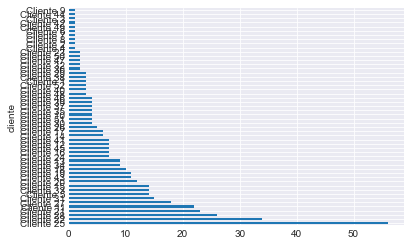

In [47]:
#image = plt.figure(figsize=(19.2,10.80))

df_geral.groupby(['cliente']).size()
image=df_geral.groupby(['cliente']).size().sort_values(ascending=False).plot.barh()
df_geral.groupby(['cliente']).size()


## Filtrando somente os que tem agente desconhecido

In [48]:
#filtro_desconhecido= df_geral.agente == 'Desconhecido'

filtro_desconhecido= df_geral.agente == 'Desconhecido'


desconhecido=df_geral.loc[filtro_desconhecido] 
desconhecido.head()

,numero_chamado,dt_abertura,hora_abertura,dt_fechamento,hora_fechamento,dt_diagnostico,hora_diagnostico,dt_resolucao,hora_resolucao,classificacao,categoria,cliente,produto,agente,diferenca_dias
9,10,2021-07-02,16:39:42,NaT,NaN,2021-09-29,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 30,Leaf,Desconhecido,NaN
12,13,2021-07-02,17:35:09,NaT,NaN,2021-07-15,12:00:00,NaT,NaN,Requisi��o,Controle,Cliente 35,Leaf,Desconhecido,NaN
19,20,2021-07-05,16:25:25,NaT,NaN,NaT,NaN,NaT,NaN,Requisi��o,Outros,Cliente 25,Flowe,Desconhecido,NaN
21,22,2021-07-05,16:36:16,NaT,NaN,2021-07-28,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 25,Flowe,Desconhecido,NaN
24,25,2021-07-06,11:27:43,NaT,NaN,2021-07-13,14:00:00,NaT,NaN,Incidente,Sintonia,Cliente 9,Leaf,Desconhecido,NaN


In [49]:
#desconhecido.groupby(['dt_abertura']).size().sort_values(ascending=False).head(25)
desconhecido.groupby(['dt_abertura']).size().head(10)

dt_abertura
2021-07-02    2
2021-07-05    2
2021-07-06    2
2021-07-07    4
2021-07-08    1
2021-07-12    5
2021-07-13    2
2021-07-14    5
2021-07-15    2
2021-07-19    3
dtype: int64

#### Criei a coluna que mostra a quantidade de dias que o chamado ainda está aberto

In [50]:
desconhecido['dias_aberto'] =  datetime.datetime(2021, 9, 30) - desconhecido.dt_abertura;
desconhecido['dias_aberto'] = (desconhecido['dias_aberto']).dt.days;

C:\Users\Victor\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Victor\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
desconhecido.groupby(['cliente', desconhecido.dias_aberto]).size().tail(60)
#desconhecido.groupby(['cliente', desconhecido.produto]).categoria.size().sort_values(ascending=False)

#desconhecido.groupby(['cliente', desconhecido.dias_aberto]).sum()


cliente     dias_aberto
Cliente 28  79             1
            80             1
            85             1
Cliente 29  31             1
Cliente 3   21             1
Cliente 30  90             1
Cliente 31  5              1
            35             1
            50             1
            55             2
            77             1
Cliente 32  80             1
Cliente 33  2              1
            5              1
            8              1
            9              1
            11             1
            13             1
            20             2
            24             1
Cliente 34  31             1
            39             1
            48             2
            51             1
            56             1
Cliente 35  80             1
            90             1
Cliente 37  17             2
            24             1
Cliente 38  17             1
            20             1
Cliente 4   18             1
Cliente 40  28             1
            29     

In [52]:
filtro = desconhecido.cliente == 'Cliente 52'
desconhecido.loc[filtro]


,numero_chamado,dt_abertura,hora_abertura,dt_fechamento,hora_fechamento,dt_diagnostico,hora_diagnostico,dt_resolucao,hora_resolucao,classificacao,categoria,cliente,produto,agente,diferenca_dias,dias_aberto
251,252,2021-08-20,10:53:20,NaT,NaN,2021-08-20,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 52,Leaf,Desconhecido,NaN,41
321,322,2021-09-06,11:02:06,NaT,NaN,2021-09-08,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 52,Leaf,Desconhecido,NaN,24


In [53]:
filtro = df_geral.cliente == 'Cliente 45'
df_geral.loc[filtro]


,numero_chamado,dt_abertura,hora_abertura,dt_fechamento,hora_fechamento,dt_diagnostico,hora_diagnostico,dt_resolucao,hora_resolucao,classificacao,categoria,cliente,produto,agente,diferenca_dias
311,312,2021-09-04,10:53:02,NaT,NaN,2021-09-04,12:00:00,NaT,NaN,Incidente,Sintonia,Cliente 45,Leaf,Desconhecido,NaN
312,313,2021-09-04,11:05:38,2021-09-11,10:00:10,2021-09-08,12:00:00,2021-09-08,00:00:00,Incidente,Sintonia,Cliente 45,Leaf,Agente 8,7.0
343,344,2021-09-11,08:27:20,NaT,NaN,2021-09-11,12:00:00,NaT,NaN,Incidente,Incidente de Infraestrutura,Cliente 45,Leaf,Desconhecido,NaN
357,358,2021-09-14,08:36:28,2021-09-23,09:49:47,2021-09-13,09:00:00,2021-09-13,00:00:00,Incidente,Incidente de Infraestrutura,Cliente 45,Leaf,Agente 8,9.0
358,359,2021-09-14,08:42:22,NaT,NaN,2021-09-14,12:00:00,NaT,NaN,Incidente,Incidente de Infraestrutura,Cliente 45,Leaf,Desconhecido,NaN
362,363,2021-09-15,11:43:58,NaT,NaN,2021-09-15,10:00:00,NaT,NaN,Incidente,Incidente de Infraestrutura,Cliente 45,Leaf,Desconhecido,NaN
406,407,2021-09-25,15:03:46,NaT,NaN,2021-09-11,12:00:00,NaT,NaN,Incidente,Incidente de Infraestrutura,Cliente 45,Leaf,Desconhecido,NaN


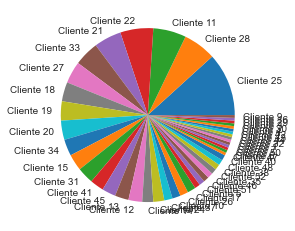

In [54]:
desconhecido.groupby(['cliente']).cliente.size().sort_values(ascending=False).plot.pie(label='');
#desconhecido.groupby(['cliente']).cliente.size().sort_values(ascending=False)


In [55]:
filtro_jul= desconhecido.dt_abertura.dt.month == 7
desconhecido.loc[filtro_jul].groupby(['cliente']).size().sum()

'''
40 chamados sem agente em julho
74 chamados em agosto
82 chamados em setembro
'''

'\n40 chamados sem agente em julho\n74 chamados em agosto\n82 chamados em setembro\n'

produto
Flowe     82
Leaf     114
dtype: int64

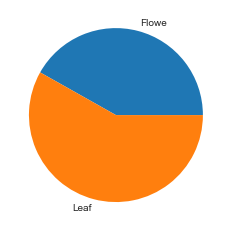

In [56]:
desconhecido.groupby(['produto']).size().plot.pie(label='');
desconhecido.groupby(['produto']).size()

### Média de tempo até o fechamento de um chamado por agente

In [57]:
medias_agente=[]
medias_agente.append(df_geral.loc[filtro_agente1].groupby(['dt_abertura']).diferenca_dias.sum().mean())
medias_agente.append(df_geral.loc[filtro_agente2].groupby(['dt_abertura']).diferenca_dias.sum().mean())
medias_agente.append(df_geral.loc[filtro_agente3].groupby(['dt_abertura']).diferenca_dias.sum().mean())
medias_agente.append(df_geral.loc[filtro_agente4].groupby(['dt_abertura']).diferenca_dias.sum().mean())
medias_agente.append(df_geral.loc[filtro_agente5].groupby(['dt_abertura']).diferenca_dias.sum().mean())
medias_agente.append(df_geral.loc[filtro_agente6].groupby(['dt_abertura']).diferenca_dias.sum().mean())
medias_agente.append(df_geral.loc[filtro_agente7].groupby(['dt_abertura']).diferenca_dias.sum().mean())
medias_agente.append(df_geral.loc[filtro_agente8].groupby(['dt_abertura']).diferenca_dias.sum().mean())
#medias_agente.append(df_geral.loc[filtro_desconhecido].groupby(['dt_abertura']).diferenca_dias.sum().mean())






In [58]:
medias_agente
#media de dias pra fechamente de um chamado de cada agente em ordem

[10.0,
 16.185185185185187,
 21.941176470588236,
 17.6,
 10.631578947368421,
 9.533333333333333,
 17.952380952380953,
 16.36842105263158]

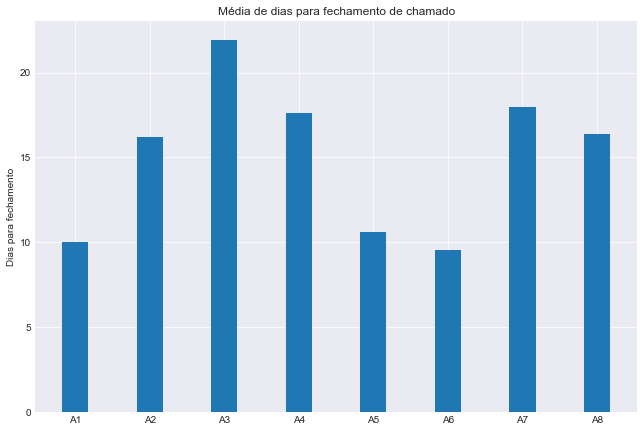

In [59]:
#plt.subplots(figsize=(10.8,7.2))
#ax=plt.subplots(figsize=(10.8,7.2))

fig, ax = plt.subplots(figsize=(10.8,7.2))
ind = np.arange(8)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
indice=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']
ax.set_ylabel('Dias para fechamento')
ax.set_title('Média de dias para fechamento de chamado')

p1 = ax.bar(indice, medias_agente, width)
plt.show()


C:\Users\Victor\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Victor\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


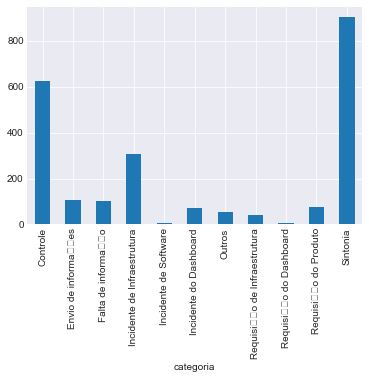

In [60]:
df_geral.groupby(['categoria']).diferenca_dias.sum().plot.bar();

In [61]:
df_geral.head()

,numero_chamado,dt_abertura,hora_abertura,dt_fechamento,hora_fechamento,dt_diagnostico,hora_diagnostico,dt_resolucao,hora_resolucao,classificacao,categoria,cliente,produto,agente,diferenca_dias
0,1,2021-07-01,08:19:30,2021-07-01,12:23:47,2021-07-01,12:00:00,2021-07-01,00:00:00,Incidente,Incidente de Software,Cliente 35,Leaf,Agente 1,0.0
1,2,2021-07-01,14:43:27,2021-07-19,16:01:12,NaT,NaN,NaT,NaN,Requisi��o,Controle,Cliente 41,Flowe,Agente 2,18.0
2,3,2021-07-02,08:36:08,2021-07-19,17:58:29,2021-07-02,12:00:00,2021-07-02,00:00:00,Incidente,Sintonia,Cliente 28,Leaf,Agente 1,17.0
3,4,2021-07-02,08:42:12,2021-08-02,14:35:22,NaT,NaN,NaT,NaN,Requisi��o,Controle,Cliente 22,Flowe,Agente 3,31.0
4,5,2021-07-02,16:01:32,2021-07-02,16:59:09,NaT,NaN,NaT,NaN,Requisi��o,Controle,Cliente 25,Flowe,Agente 2,0.0


In [62]:
#df_geral.loc[filtro_agente8].groupby(['categoria', df_geral.cliente]).diferenca_dias.sum()
df_geral.groupby(['cliente', df_geral.produto]).categoria.size()


cliente     produto
Cliente 1   Leaf        3
Cliente 10  Leaf        4
Cliente 11  Flowe      22
Cliente 12  Leaf        7
Cliente 13  Flowe       4
            Leaf        5
Cliente 14  Leaf        6
Cliente 15  Flowe      14
Cliente 16  Leaf        7
Cliente 17  Flowe       6
Cliente 18  Leaf       10
Cliente 19  Leaf       11
Cliente 2   Leaf        1
Cliente 20  Leaf       12
Cliente 21  Flowe      23
Cliente 22  Flowe      34
Cliente 23  Flowe       2
Cliente 24  Leaf        7
Cliente 25  Flowe      56
Cliente 26  Leaf        5
Cliente 27  Flowe      18
Cliente 28  Leaf       26
Cliente 29  Leaf        3
Cliente 3   Leaf        1
Cliente 30  Leaf        4
Cliente 31  Leaf       15
Cliente 32  Leaf        2
Cliente 33  Leaf       14
Cliente 34  Leaf        9
Cliente 35  Leaf        4
Cliente 36  Leaf        2
Cliente 37  Leaf        4
Cliente 38  Leaf        3
Cliente 39  Leaf        4
Cliente 4   Leaf        1
Cliente 40  Leaf        3
Cliente 41  Flowe       7
Cliente 42  Flowe 

In [63]:
filtro = df_geral.categoria == 'Controle'
#df_geral.loc[filtro].groupby(['dt_abertura']).size().plot.bar(title='Chamados');
#df_geral.loc[filtro].groupby(['diferenca_dias']).size()
(df_geral.loc[df_geral.categoria == 'Sintonia'])['diferenca_dias'].mean()



16.107142857142858

In [64]:
medias_tipo = {'Controle':(df_geral.loc[df_geral.categoria == 'Controle'])['diferenca_dias'].mean(),
               'Envio de informações': (df_geral.loc[df_geral.categoria == 'Outros'])['diferenca_dias'].mean(),
               'Outros': (df_geral.loc[df_geral.categoria == 'Outros'])['diferenca_dias'].mean(),
               'Requisição de Infraestrutura':(df_geral.loc[df_geral.categoria == 'Requisi��o de Infraestrutura'])['diferenca_dias'].mean(),
               'Requisição do Dashboard': (df_geral.loc[df_geral.categoria == 'Requisi��o do Dashboard'])['diferenca_dias'].mean(),
               'Requisição do Produto': (df_geral.loc[df_geral.categoria == 'Requisi��o do Produto'])['diferenca_dias'].mean(),
               'Falta de informação':(df_geral.loc[df_geral.categoria == 'Falta de informa��o'])['diferenca_dias'].mean(),
               'Incidente de Infraestrutura':(df_geral.loc[df_geral.categoria == 'Incidente de Infraestrutura'])['diferenca_dias'].mean(),
               'Incidente de Software':(df_geral.loc[df_geral.categoria == 'Incidente de Software'])['diferenca_dias'].mean(),
               'Incidente do Dashboard':(df_geral.loc[df_geral.categoria == 'Incidente do Dashboard'])['diferenca_dias'].mean(),
               'Sintonia':(df_geral.loc[df_geral.categoria == 'Sintonia'])['diferenca_dias'].mean()}
                
               
                
                
                

In [65]:
medias_tipo

{'Controle': 11.537037037037036,
 'Envio de informações': 17.333333333333332,
 'Outros': 17.333333333333332,
 'Requisição de Infraestrutura': 6.666666666666667,
 'Requisição do Dashboard': 3.0,
 'Requisição do Produto': 9.5,
 'Falta de informação': 7.6923076923076925,
 'Incidente de Infraestrutura': 5.385964912280702,
 'Incidente de Software': 0.5555555555555556,
 'Incidente do Dashboard': 10.142857142857142,
 'Sintonia': 16.107142857142858}

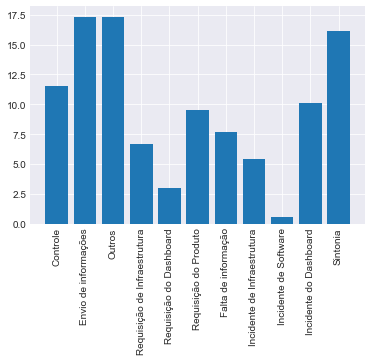

In [66]:
plt.bar(*zip(*medias_tipo.items()))
plt.xticks(rotation=90);
plt.show()

In [67]:
filtro = df_geral.classificacao == 'Incidente'
df_geral.loc[filtro].groupby(['categoria']).cliente.size()


categoria
Falta de informa��o             22
Incidente de Infraestrutura    108
Incidente de Software           16
Incidente do Dashboard          14
Sintonia                       103
Name: cliente, dtype: int64

In [68]:
filtro = df_geral.classificacao == 'Requisi��o'
#df_geral.loc[filtro].groupby(['dt_abertura']).size().plot.bar(title='Chamados');
df_geral.loc[filtro].groupby(['categoria']).cliente.size()
#df_geral.loc[filtro].groupby(['cliente', df_geral.categoria]).diferenca_dias.count()

categoria
Controle                        90
Envio de informa��es             9
Outros                           8
Requisi��o de Infraestrutura    11
Requisi��o do Dashboard          7
Requisi��o do Produto           12
Name: cliente, dtype: int64